In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
%matplotlib inline

In [118]:
x = np.linspace(-5,5,100)
f1 = x**3-5*x-5
f2 = -3*x+2

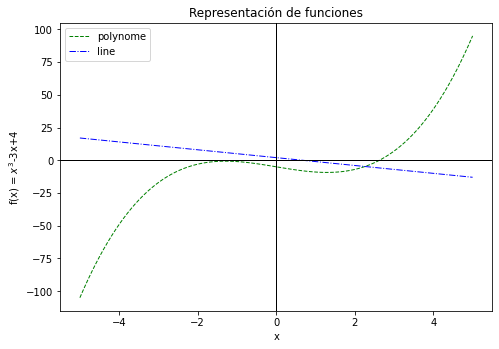

In [120]:
# gráficas
fig = plt.figure()
ax1 = fig.add_axes([0,0,1,1])

ax1.plot(x,f1, color = 'green', linestyle='--', linewidth=1)
ax1.plot(x,f2, color = 'blue', linestyle='dashdot', linewidth=1)

# rótulos
ax1.legend(['polynome', 'line'])
ax1.set_xlabel('x')
ax1.set_ylabel('f(x) = $x^{3}$-3x+4')
ax1.set_title('Representación de funciones')
# ejes
ax1.axhline(y=0, color = 'black', linewidth=1)
ax1.axvline(x=0, color = 'black', linewidth=1)
plt.show()

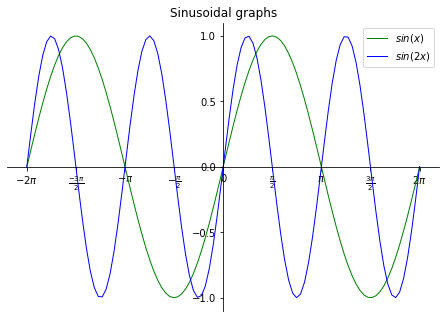

In [125]:
fig = plt.figure()
ax1 = fig.add_axes([0,0,1,1])

# define data to plot
x = np.linspace(-2*np.pi, 2*np.pi,100)
senx = np.sin(x)
sen2x = np.sin(2*x)

#ax2 = fig.add_axes([0,0,1,1])
ax1.plot(x,senx, color = 'green', linewidth=1)
ax1.plot(x,sen2x, color = 'blue', linewidth=1)

# x tick labels
x_ticks = np.arange(-2*np.pi, 2*np.pi + 1, np.pi/2)
x_labels = [r'$-2\pi$', r'$\frac{-3\pi}{2}$', r'$-\pi$', r'$-\frac{\pi}{2}$', '0',
           r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$']
ax1.set_xticks(x_ticks)
ax1.set_xticklabels(x_labels)

# set y ticks
ax1.set_yticks(np.arange(-1,1.5,0.5))
ax1.legend(['$sin(x)$', '$sin(2x)$'])
#ax1.set_xlabel('x')
#ax1.set_ylabel('f(x)')
ax1.set_title('Sinusoidal graphs')

#ax1.axhline(y=0, color = 'black', linewidth=1)
#ax1.axvline(x=0, color = 'black', linewidth=1)

# set spines as axis
ax1.spines['top'].set_color('None')
ax1.spines['right'].set_color('None')
ax1.spines['bottom'].set_position(('data', 0))
ax1.spines['left'].set_position(('data',0))

plt.show()

In [299]:
df = pd.read_csv('datos_falsos.csv')

In [127]:
df.head()

,id,first_name,last_name,email,gender,ip_address,date,salary
0,1,Hinda,Morican,hmorican0@blinklist.com,Bigender,140.102.89.203,09/11/2021,1323
1,2,Marwin,McMakin,mmcmakin1@nydailynews.com,Male,102.95.205.140,26/08/2021,1395
2,3,Orson,Endrici,oendrici2@slate.com,Male,203.115.109.211,30/05/2021,1393
3,4,Sauncho,Loughman,sloughman3@soundcloud.com,Genderqueer,243.214.38.13,20/03/2021,1472
4,5,Darsey,Thursby,dthursby4@w3.org,Male,241.181.212.135,03/01/2021,1291


In [301]:
df.dtypes

id                     int64
first_name            object
last_name             object
email                 object
gender                object
ip_address            object
date          datetime64[ns]
salary                 int64
dtype: object

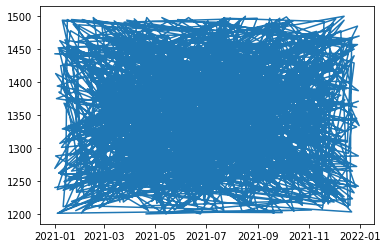

In [129]:
x = df['date']
y = df['salary']
plt.plot(x,y)

In [302]:
df['date'] = pd.to_datetime(df['date'], infer_datetime_format = True)

In [131]:
df['date'].tail()

995   2021-04-15
996   2021-10-06
997   2021-11-30
998   2021-03-05
999   2021-09-19
Name: date, dtype: datetime64[ns]

Ordeno los valores de fechas

In [132]:
df.sort_values(by='date', inplace=True)

In [133]:
df['date'].max()

Timestamp('2021-12-31 00:00:00')

In [134]:
df['date'].min()

Timestamp('2021-01-01 00:00:00')

In [135]:
df.shape[0]

1000

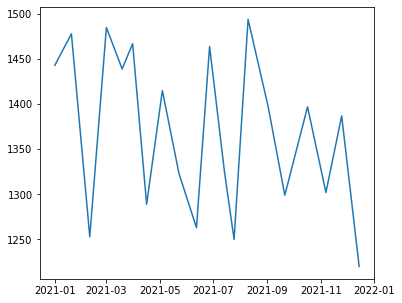

In [136]:
x = df['date'][::50]
y = df['salary'][::50]
fig = plt.figure(figsize=(6,5))
plt.plot(x,y)
#plt.xticks(x,rotate=45)
plt.show()

In [148]:
# establecer fechas como índice
new_df = df.set_index('date', drop=True)

Si agrupamos por fecha y usamos una función de agregación, ipython arroja un error:  
`/tmp/ipykernel_4284/1015375959.py:4: FutureWarning: ['first_name', 'last_name', 'email', 'gender', 'ip_address'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  datos = new_df.groupby(pd.Grouper(freq='MS')).agg(['mean'])  # .agg(list of functions to aggregate)`  

Es necesario eliminar las columnas no numéricas

In [160]:
new_df.columns

Index(['id', 'first_name', 'last_name', 'email', 'gender', 'ip_address',
       'salary'],
      dtype='object')

In [161]:
cols2drop = list(new_df.columns)
cols2drop.remove('salary')
cols2drop

['id', 'first_name', 'last_name', 'email', 'gender', 'ip_address']

In [162]:
new_df.drop(cols2drop, axis=1, inplace=True)

In [222]:
# agrupar las fechas por inicio de mes y calcular la media de salario para cada mes
datos = new_df.groupby(pd.Grouper(freq='MS')).agg(['mean'])  # .agg(list of functions to aggregate)

In [226]:
datos

,salary
,mean
date,
2021-01-01,1348.307692
2021-02-01,1337.900000
2021-03-01,1354.600000
2021-04-01,1353.579545
2021-05-01,1353.075000
2021-06-01,1346.947368
2021-07-01,1357.883929
2021-08-01,1353.970588


`datos` es un dataframe multiIndex

In [227]:
datos['salary','mean']

date
2021-01-01    1348.307692
2021-02-01    1337.900000
2021-03-01    1354.600000
2021-04-01    1353.579545
2021-05-01    1353.075000
2021-06-01    1346.947368
2021-07-01    1357.883929
2021-08-01    1353.970588
2021-09-01    1357.771429
2021-10-01    1350.695652
2021-11-01    1337.182927
2021-12-01    1355.746988
Freq: MS, Name: (salary, mean), dtype: float64

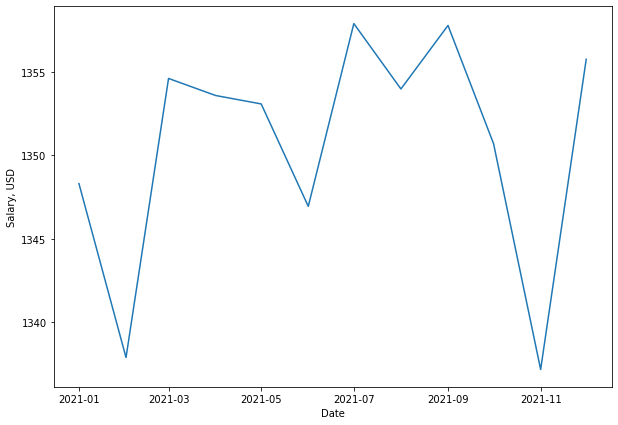

In [166]:
#x = datos.index
#y = datos['salary']
fig = plt.figure(figsize=(10,7))
# plot toma como etiquetas del eje x al índice del dataframe
# como valores del eje y, toma los valores que contiene el dataframe
plt.ylabel('Salary, USD')
plt.xlabel('Date')
plt.plot(datos)
plt.show()

Si el dataframe tiene más de una columna numérica, plot representará esa columna adicional como otra línea más en el gráfico plot

In [296]:
datos = pd.DataFrame({'salary': datos['salary','mean'].values}, index= datos.index)

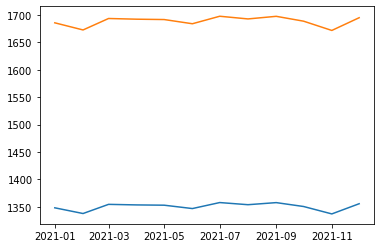

In [297]:
# añadimos un plus de salario de 150 USD en meses seleccionados aleatoriamente
datos['salary_bonused'] = datos['salary']*1.25
fig = plt.figure()
plt.plot(datos)

In [252]:
# añadimos un plus de salario de 150 USD en meses seleccionados aleatoriamente
bonused_months = np.random.randint(0,2,12)
# work out bonification
bonus = np.where(bonused_months == 0 , bonused_months, bonused_months * 150)
# create dataFrame in order to add column values
df_bonus = pd.DataFrame(bonus, columns=['bonus'])
# in order to add values from two columns, both dataframes MUST HAVE SAME INDECES
index = datos.index
# create extra column in datos
datos['bonused salary'] = datos['salary','mean'] + plus['bonus']
datos

,salary,bonused salary
,mean,
date,,
2021-01-01,1348.307692,1498.307692
2021-02-01,1337.900000,1337.900000
2021-03-01,1354.600000,1354.600000
2021-04-01,1353.579545,1503.579545
2021-05-01,1353.075000,1503.075000
2021-06-01,1346.947368,1346.947368
2021-07-01,1357.883929,1357.883929
2021-08-01,1353.970588,1503.970588


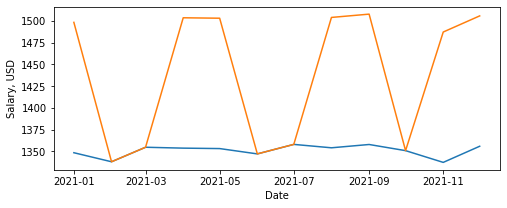

In [255]:
#x = datos.index
#y = datos['salary']
fig = plt.figure(figsize=(8,3))
# plot toma como etiquetas del eje x al índice del dataframe
# como valores del eje y, toma los valores que contiene el dataframe
plt.ylabel('Salary, USD')
plt.xlabel('Date')
plt.plot(datos)
plt.show()

In [276]:
new_df = pd.DataFrame(datos['salary'])
new_df.columns=['salary']
new_df['salary 2'] = new_df['salary']* (np.random.rand(12)+1)
new_df

,salary,salary 2
date,,
2021-01-01,1348.307692,2119.729327
2021-02-01,1337.900000,2445.198379
2021-03-01,1354.600000,2625.440154
2021-04-01,1353.579545,1536.272210
2021-05-01,1353.075000,2151.102251
2021-06-01,1346.947368,2309.991607
2021-07-01,1357.883929,1887.081370
2021-08-01,1353.970588,2340.370363
2021-09-01,1357.771429,2427.392745


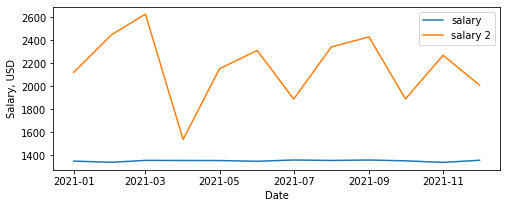

In [277]:
#x = datos.index
#y = datos['salary']
fig = plt.figure(figsize=(8,3))
# plot toma como etiquetas del eje x al índice del dataframe
# como valores del eje y, toma los valores que contiene el dataframe
plt.ylabel('Salary, USD')
plt.xlabel('Date')
plt.plot(new_df)
plt.legend(['salary', 'salary 2'])
plt.show()

In [287]:
walk1 = np.random.randint(-1,2,100)
walk1 = walk1.cumsum()
walk2 = np.random.randint(-1,2,100)
walk2 = walk2.cumsum()
df = pd.DataFrame({'Walk 1': walk1, 'Walk 2': walk2})
df

,Walk 1,Walk 2
0,1,-1
1,1,-2
2,1,-3
3,0,-3
4,0,-4
...,...,...
95,-6,7
96,-7,6
97,-8,6
98,-7,6


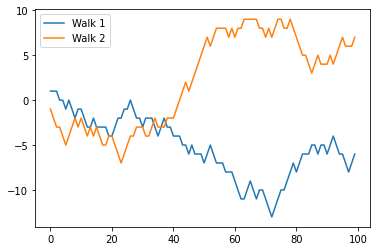

In [294]:
plt.plot(df)
plt.legend(['Walk 1', 'Walk 2'])
plt.show()

In [303]:
df

,id,first_name,last_name,email,gender,ip_address,date,salary
0,1,Hinda,Morican,hmorican0@blinklist.com,Bigender,140.102.89.203,2021-09-11,1323
1,2,Marwin,McMakin,mmcmakin1@nydailynews.com,Male,102.95.205.140,2021-08-26,1395
2,3,Orson,Endrici,oendrici2@slate.com,Male,203.115.109.211,2021-05-30,1393
3,4,Sauncho,Loughman,sloughman3@soundcloud.com,Genderqueer,243.214.38.13,2021-03-20,1472
4,5,Darsey,Thursby,dthursby4@w3.org,Male,241.181.212.135,2021-03-01,1291
...,...,...,...,...,...,...,...,...
995,996,Roddy,Hutchinson,rhutchinsonrn@mapy.cz,Agender,121.91.147.21,2021-04-15,1212
996,997,Opalina,Munsey,omunseyro@live.com,Genderqueer,144.46.249.249,2021-10-06,1335
997,998,Richardo,Synnot,rsynnotrp@redcross.org,Genderqueer,53.79.142.104,2021-11-30,1489
998,999,Fannie,Sinnott,fsinnottrq@plala.or.jp,Polygender,235.98.100.249,2021-03-05,1283


In [317]:
df['gender'].unique()

array(['Bigender', 'Male', 'Genderqueer', 'Non-binary', 'Female',
       'Polygender', 'Genderfluid', 'Agender'], dtype=object)

In [318]:
df['gender'].value_counts()

Agender        137
Female         134
Polygender     130
Genderfluid    125
Male           123
Non-binary     123
Genderqueer    118
Bigender       110
Name: gender, dtype: int64

In [319]:
df.value_counts('gender')

gender
Agender        137
Female         134
Polygender     130
Genderfluid    125
Male           123
Non-binary     123
Genderqueer    118
Bigender       110
dtype: int64

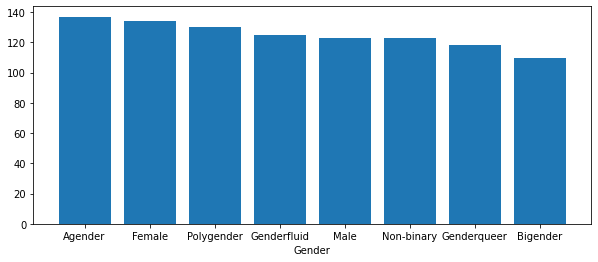

In [322]:
x = df['gender'].value_counts().index
y = df['gender'].value_counts()

fig = plt.figure(figsize=(10,4))
plt.bar(x,y)
plt.xlabel('Gender')
plt.show()

In [373]:
# valores
x = df['gender'].value_counts().index
#y = df['gender'].value_counts()
size = df['gender'].value_counts().shape[0]
y = df['gender'].value_counts() * np.random.rand(size)

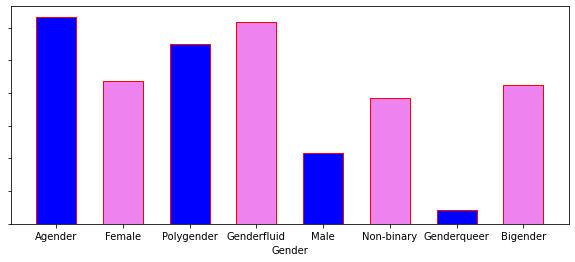

In [381]:
fig = plt.figure(figsize=(10,4))
colors = ['blue', 'violet']
plt.bar(x,y, width=0.6, edgecolor='red', color= colors)
plt.xlabel('Gender')
#plt.ylim(ymin, ymax)

# hide left ticks
plt.tick_params(labelleft=False)

plt.show()